In [1]:
import matplotlib.pyplot as plt
import numpy as np

from neuralplayground.agents import Whittington2020
from neuralplayground.arenas import BatchEnvironment
from neuralplayground.arenas import DiscreteObjectEnvironment
from neuralplayground.backend import tem_training_loop
from neuralplayground.backend import SingleSim

from neuralplayground.agents.whittington_2020_extras import whittington_2020_parameters as parameters
from neuralplayground.experiments import Sargolini2006Data

from neuralplayground.agents import Stachenfeld2018
from neuralplayground.arenas import Simple2D
from neuralplayground.backend import episode_based_training_loop

In [2]:
simulation_id = "TEM_custom_sim"
agent_class = Whittington2020
env_class = BatchEnvironment
training_loop = tem_training_loop

params = parameters.parameters()
full_agent_params = params.copy()

arena_x_limits = [[-5,5], [-4,4], [-5,5], [-6,6], [-4,4], [-5,5], [-6,6], [-5,5], [-4,4], [-5,5], [-6,6], [-5,5], [-4,4], [-5,5], [-6,6], [-5,5]]
arena_y_limits = [[-5,5], [-4,4], [-5,5], [-6,6], [-4,4], [-5,5], [-6,6], [-5,5], [-4,4], [-5,5], [-6,6], [-5,5], [-4,4], [-5,5], [-6,6], [-5,5]]
room_widths = [10, 8, 10, 12, 8, 10, 12, 10, 8, 10, 12, 10, 8, 10, 12, 10]
room_depths = [10, 8, 10, 12, 8, 10, 12, 10, 8, 10, 12, 10, 8, 10, 12, 10]

env_params = {"environment_name": "BatchEnvironment",
              "env_class": DiscreteObjectEnvironment,
              "batch_size": 16,
              "arena_x_limits": arena_x_limits,
              "arena_y_limits": arena_y_limits,
              "state_density": 1,
              "n_objects": params["n_x"],
              "agent_step_size": 1,
              "use_behavioural_data": False,
              "data_path": None,
              "experiment_class": Sargolini2006Data}
agent_params = {"model_name": "SimpleTEM",
                "params": full_agent_params,
                "batch_size": 16,
                "room_widths": room_widths,
                "room_depths": room_depths,
                "state_densities": [1]*16,
                "use_behavioural_data": False}

training_loop_params = {"n_episode": 3, "params": full_agent_params}

In [3]:
sim = SingleSim(simulation_id = simulation_id,
                agent_class = agent_class,
                agent_params = agent_params,
                env_class = env_class,
                env_params = env_params,
                training_loop = training_loop,
                training_loop_params = training_loop_params)

In [4]:
print(sim)

Simulation: TEM_custom_sim
Agent: <class 'neuralplayground.agents.whittington_2020.Whittington2020'>
Agent params: {'model_name': 'SimpleTEM', 'params': {'has_static_action': True, 'n_actions': 4, 'explore_bias': 2, 'shiny_rate': 0, 'shiny_gamma': 0.7, 'shiny_beta': 1.5, 'shiny_n': 2, 'shiny_returns': 15, 'shiny': {'gamma': 0.7, 'beta': 1.5, 'n': 2, 'returns': 15}, 'train_it': 20000, 'n_rollout': 20, 'save_interval': 1000, 'n_envs_save': 6, 'batch_size': 16, 'state_density': 1, 'walk_it_min': 25, 'walk_it_max': 300, 'walk_it_window': 55.0, 'loss_weights_x': 1, 'loss_weights_p': 1, 'loss_weights_g': 1, 'loss_weights_reg_g': 0.01, 'loss_weights_reg_p': 0.02, 'loss_weights': tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.0100, 0.0200]), 'loss_weights_p_g_it': 2000, 'loss_weights_reg_p_it': 4000, 'loss_weights_reg_g_it': 40000000, 'eta_it': 16000, 'lambda_it': 200, 'p2g_scale_offset': 0, 'p2g_sig_val': 10000, 'p2g_sig_half_it': 400, 'p2g_sig_scale_it': 200, 'lr_max': 0.00094, 'l

In [5]:
sim.run_sim()

In [6]:
trained_agent, env, training_hist = sim.load_results()

In [7]:
sim.show_logs()

<Axes: >

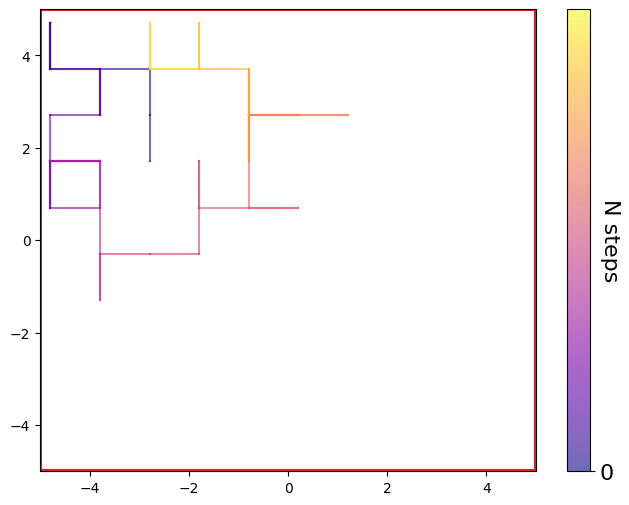

In [8]:
env.plot_trajectory()